In [156]:
import matplotlib.pyplot as plt
import numpy as np
import time

N_CITIES = 20  
DNA_SIZE =20
CROSS_RATE = 0.5
MUTATE_RATE = 0.01
POP_SIZE = 500
N_GENERATIONS = 500

X_BOUND = [-5, 5]
CITY_POSITIONS=[[0.62438291 ,0.82178505],
 [0.04169322 ,0.87324915],
 [0.41212068 ,0.75284606],
 [0.36344985 ,0.01829036],
 [0.68850325 ,0.54933196],
 [0.87354669 ,0.64206707],
 [0.22960069 ,0.73200151],
 [0.18292416 ,0.72679727],
 [0.29964816 ,0.65428754],
 [0.17463048 ,0.93999983],
 [0.47599872 ,0.79141143],
 [0.39267136 ,0.43828946],
 [0.75460859 ,0.40501416],
 [0.27784902 ,0.92334604],
 [0.83258482 ,0.39183078],
 [0.63282944 ,0.14352982],
 [0.72778758 ,0.79120373],
 [0.83078051 ,0.04707529],
 [0.74970826 ,0.45880596],
 [0.37795989 ,0.2785738 ]]

#print(CITY_POSITIONS)
# CITY_POSITIONS=np.array(CITY_POSITIONS)#.reshape(20,2)
#print(CITY_POSITIONS)


In [158]:
class GA_TSP(object):
    def __init__(self, DNA_size, cross_rate, mutation_rate, pop_size,problem ):
        self.DNA_size = DNA_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        self.pop_size = pop_size
        self.problem=problem
        if self.problem=='TSP':
            self.pop = np.vstack([np.random.permutation(DNA_size) for _ in range(pop_size)])
        if self.problem=='Minimal':
            self.pop = np.random.randint(2, size=(POP_SIZE, DNA_SIZE*2)) 

    def translateDNA(self, DNA, city_position):     # get cities' coord in order
        line_x = np.empty_like(DNA, dtype=np.float64)
        line_y = np.empty_like(DNA, dtype=np.float64)
        if self.problem=='TSP':
            for i, d in enumerate(DNA):
                city_coord = city_position[d]
                line_x[i, :] = city_coord[:, 0]
                line_y[i, :] = city_coord[:, 1]
        return line_x, line_y

    def get_fitness(self, line_x, line_y):
        if self.problem=='TSP':
            total_distance = np.empty((line_x.shape[0],), dtype=np.float64)
            for i, (xs, ys) in enumerate(zip(line_x, line_y)):
                total_distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))

                #print(line_x)
                #print("total_distance",total_distance[i])
                #print("diffx",line_x[-1]-line_x[0])

                total_distance[i]+=np.sqrt(np.square(line_x[i][-1]-line_x[i][0]) + np.square(line_y[i][-1]-line_y[i][0]))

            #res += self.matrix_distance[one_path[-1],one_path[0]]
            fitness = np.exp(self.DNA_size * 2 / total_distance)
            return fitness, total_distance
        if self.problem=='Minimal':
            pred=F(line_x,line_y)
            fitness=np.exp(pred - np.min(pred)) + 1e-3
            return fitness
        

    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p=fitness / fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i_ = np.random.randint(0, self.pop_size, size=1)                        # select another individual from pop
            cross_points = np.random.randint(0, 2, self.DNA_size).astype(np.bool)   # choose crossover points
            keep_city = parent[~cross_points]                                       # find the city number
            swap_city = pop[i_, np.isin(pop[i_].ravel(), keep_city, invert=True)]
            parent[:] = np.concatenate((keep_city, swap_city))
        return parent

    def mutate(self, child):
        for point in range(self.DNA_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.DNA_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child

    def crossover_and_mutation(pop, CROSS_RATE = 0.8):
        new_pop = []
        for father in pop:		#遍历种群中的每一个个体，将该个体作为父亲
            child = father		#孩子先得到父亲的全部基因（这里我把一串二进制串的那些0，1称为基因）
            if np.random.rand() < CROSSOVER_RATE:			#产生子代时不是必然发生交叉，而是以一定的概率发生交叉
                mother = pop[np.random.randint(POP_SIZE)]	#再种群中选择另一个个体，并将该个体作为母亲
                cross_points = np.random.randint(low=0, high=DNA_SIZE*2)	#随机产生交叉的点
                child[cross_points:] = mother[cross_points:]		#孩子得到位于交叉点后的母亲的基因
            mutate(child)	#每个后代有一定的机率发生变异
            new_pop.append(child)

        return new_pop

    def evolve(self, fitness):
        pop = self.select(fitness)
        if self.problem=='TSP':
            
            pop_copy = pop.copy()
            for parent in pop:  # for every parent
                child = self.crossover(parent, pop_copy)
                child = self.mutate(child)
                parent[:] = child
        else:
            pop = np.array(self.crossover_and_mutation(pop))
            fitness = self.get_fitness(pop)
            pop = self.select(pop, fitness) #选择生成新的种群
        self.pop = pop


class TravelSalesPerson(object):
    def __init__(self, n_cities,city_position=None):
        if city_position==None:
            self.city_position = np.random.rand(n_cities, 2) #随机生成城市
        else:
            self.city_position =np.array(city_position)
        plt.ion()
#         print(self.city_position)
    def plot_cities(self):
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=80, c='k')
        x=self.city_position[:, 0].T
        y=self.city_position[:, 1].T
        for i in range(len(x)):
            plt.annotate(i+1,xy = (x[i], y[i]), xytext = (x[i]+0.01, y[i]+0.01))
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        plt.pause(0.01)
        
    def plotting(self, lx, ly, total_d):
        plt.cla()
        plt.scatter(self.city_position[:, 0].T, self.city_position[:, 1].T, s=80, c='k')
        x=self.city_position[:, 0].T
        y=self.city_position[:, 1].T
        for i in range(len(x)):
            plt.annotate(i+1,xy = (x[i], y[i]), xytext = (x[i]+0.01, y[i]+0.01))
        plt.plot(lx.T, ly.T, 'b-')
        plt.plot([lx[-1],lx[0]],[ly[-1],ly[0]],'b')
        plt.text(-0.05, -0.05, "Total distance=%.2f" % total_d, fontdict={'size': 15, 'color': 'red'})
        plt.xlim((-0.1, 1.1))
        plt.ylim((-0.1, 1.1))
        plt.pause(0.01)



In [154]:
def TSP():
    dis_all = []
    time_all=[]
    env0 = TravelSalesPerson(N_CITIES)
    env0.plot_cities()
    for i in range(20):
        print('------------------第',i+1,'次------------------')
        start = time.time()
        ga = GA_TSP(DNA_size=N_CITIES, cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE,problem='TSP')
        env = TravelSalesPerson(N_CITIES)
        
        distance=[] 
        for generation in range(N_GENERATIONS):
            lx, ly = ga.translateDNA(ga.pop, env.city_position)
            fitness, total_distance = ga.get_fitness(lx, ly)
            ga.evolve(fitness)
            best_idx = np.argmax(fitness)
            best_dis=total_distance[best_idx]
            distance.append(best_dis)
#             if generation%30==0 or generation==N_GENERATIONS-1:
#                 print('Gen:', generation, '| best fit: %.2f' % fitness[best_idx],)
            if generation==0 or generation==N_GENERATIONS-1:
                env.plotting(lx[best_idx], ly[best_idx], total_distance[best_idx])
        end = time.time()
        dis_all.append(total_distance[best_idx])
        running_time = end-start
        time_all.append(running_time)
        plt.ioff()
        plt.show()
        # 目标函数变化曲线
        y1=distance
        y2=fitness
        x=list(range(len(distance)))
        plt.plot(x,y1)
        plt.show()
        print('time cost : %.5f sec' %running_time)
    #求均值
    dis_mean = np.mean(dis_all)
    #求方差
    dis_var = np.var(dis_all)
    #求极值
    best_idx = np.argmin(dis_all)
    worst_idx = np.argmax(dis_all)
    print('---------距离--------')
    print("平均值为：%f" % dis_mean)
    print("方差为：%f" % dis_var)
    print("最优值为:第%d次:%f"% (best_idx+1, dis_all[best_idx]))
    print("最差值为:第%d次:%f"% (worst_idx+1, dis_all[worst_idx]))
    time_mean = np.mean(time_all)
    time_var = np.var(time_all)
    best_id = np.argmin(time_all)
    worst_id = np.argmax(time_all)
    print('---------时间--------')
    print("平均值为：%f" % time_mean)
    print("方差为：%f" % time_var)
    print("最优值为:第%d次:%f"% (best_id+1, time_all[best_id]))
    print("最差值为:第%d次:%f"% (worst_id+1, time_all[worst_id]))

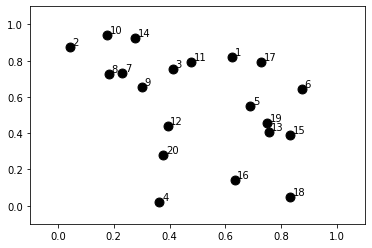

------------------第 1 次------------------


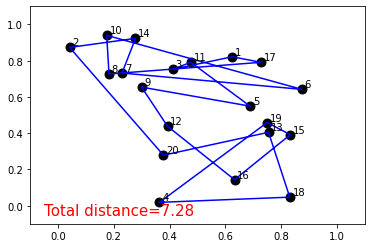

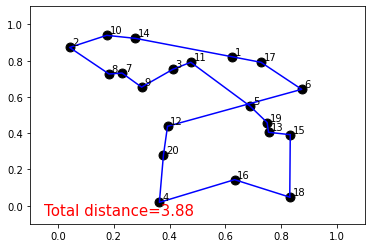

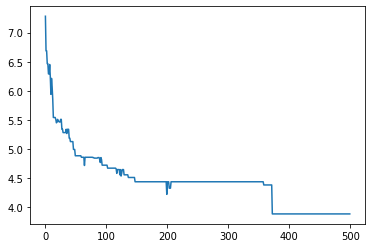

time cost : 33.87404 sec
------------------第 2 次------------------


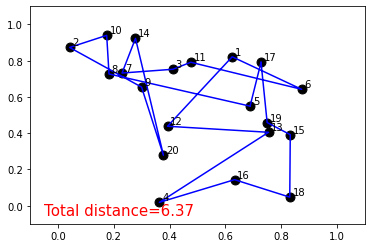

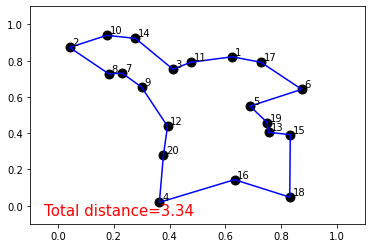

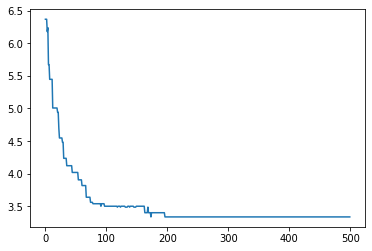

time cost : 32.88285 sec
------------------第 3 次------------------


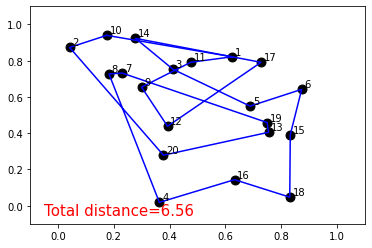

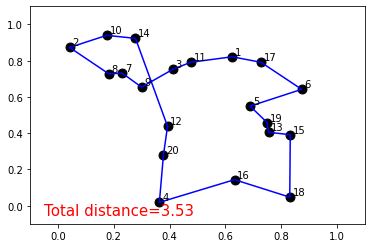

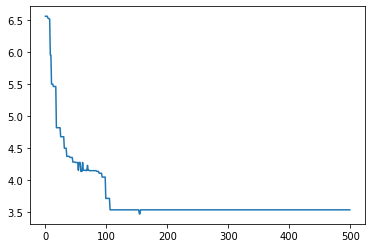

time cost : 29.82240 sec
------------------第 4 次------------------


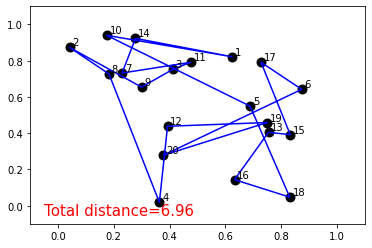

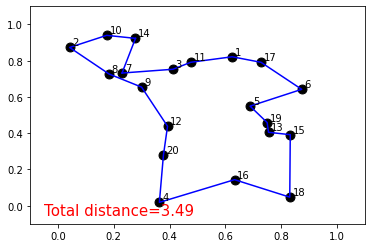

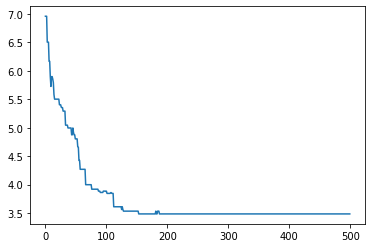

time cost : 29.67219 sec
------------------第 5 次------------------


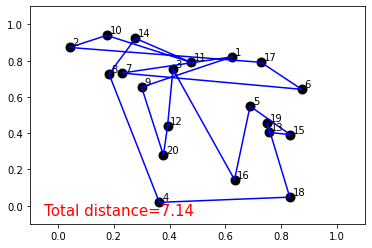

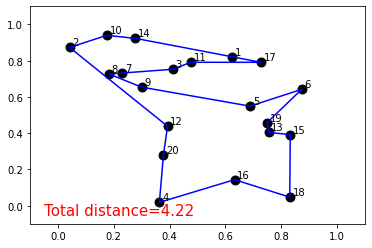

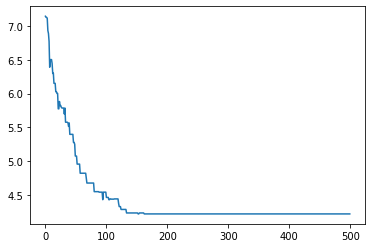

time cost : 34.59274 sec
------------------第 6 次------------------


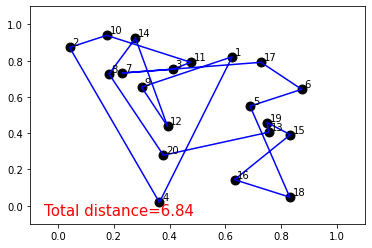

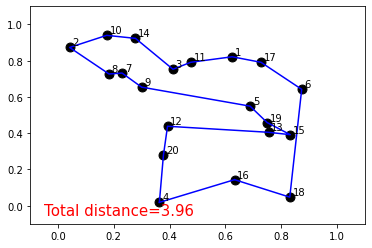

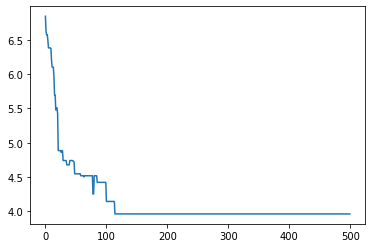

time cost : 36.24601 sec
------------------第 7 次------------------


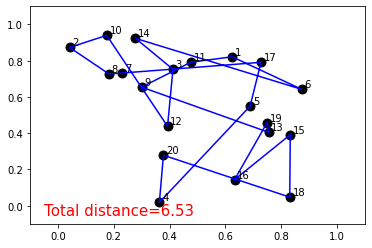

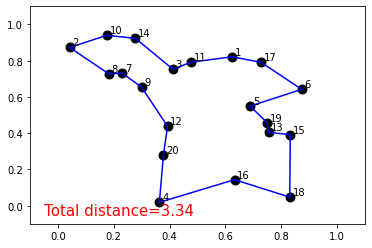

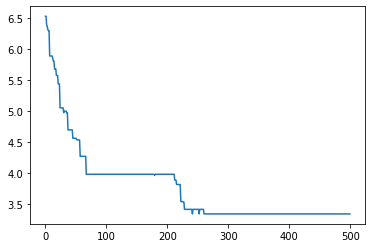

time cost : 34.52410 sec
------------------第 8 次------------------


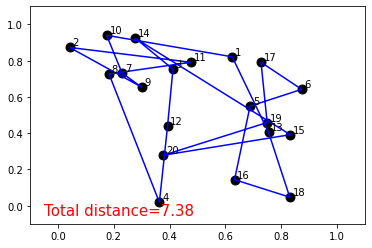

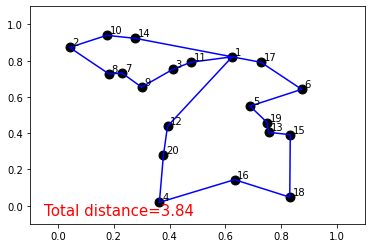

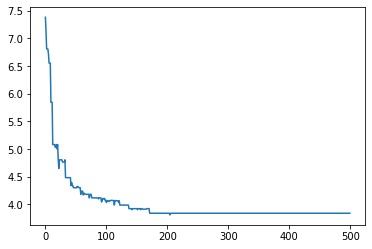

time cost : 33.22067 sec
------------------第 9 次------------------


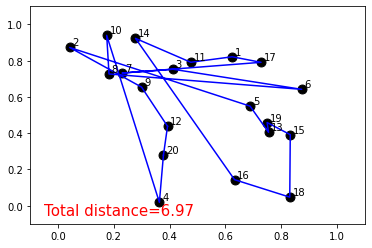

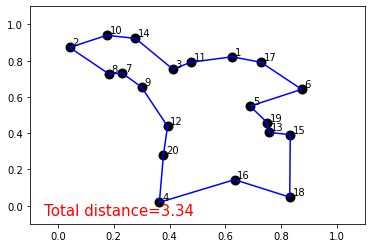

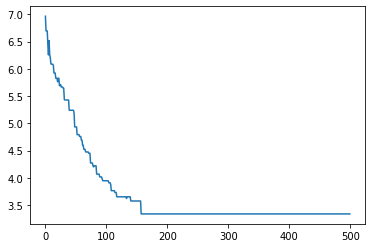

time cost : 32.95459 sec
------------------第 10 次------------------


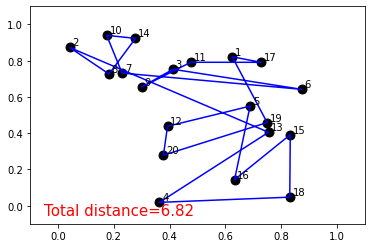

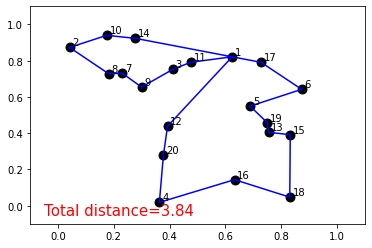

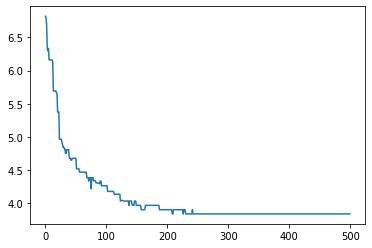

time cost : 33.81319 sec
------------------第 11 次------------------


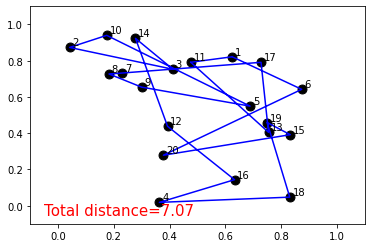

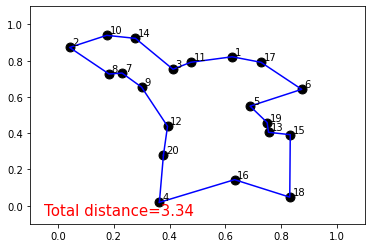

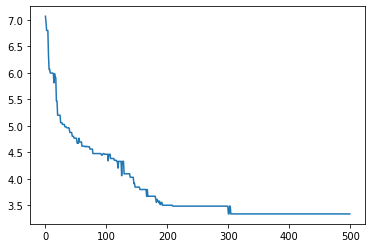

time cost : 33.67067 sec
------------------第 12 次------------------


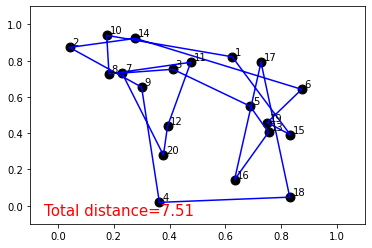

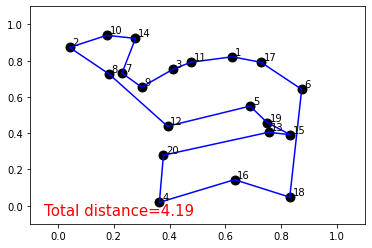

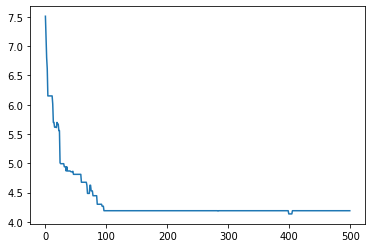

time cost : 36.18956 sec
------------------第 13 次------------------


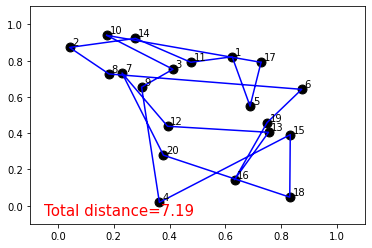

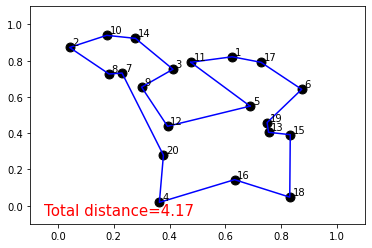

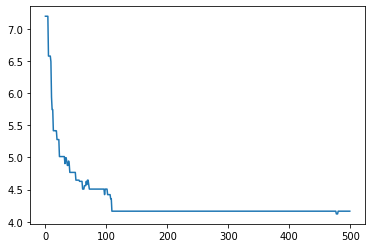

time cost : 34.87302 sec
------------------第 14 次------------------


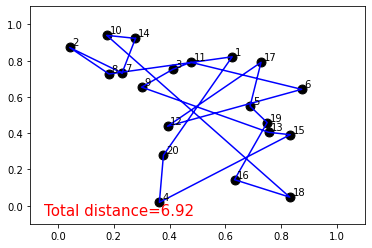

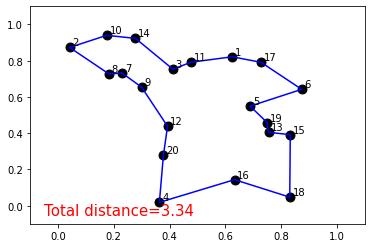

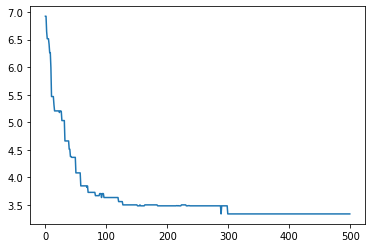

time cost : 38.25545 sec
------------------第 15 次------------------


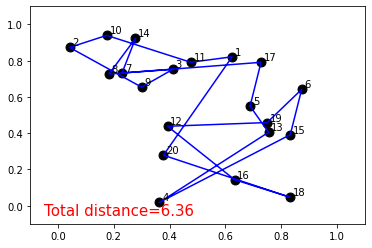

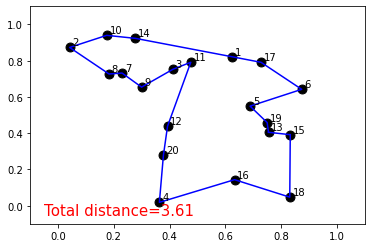

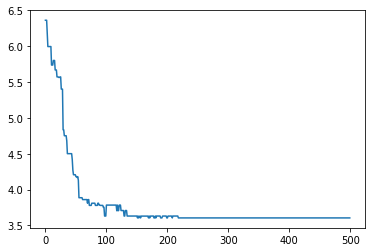

time cost : 36.87579 sec
------------------第 16 次------------------


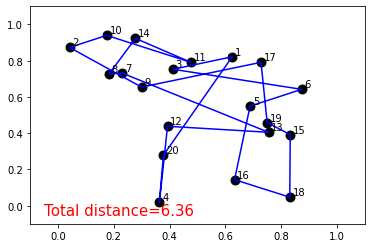

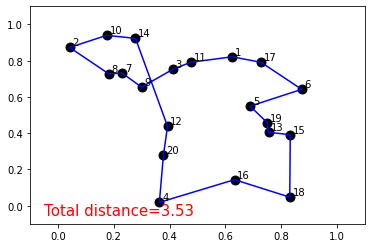

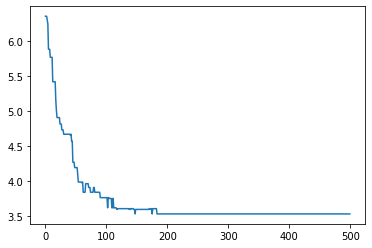

time cost : 39.47722 sec
------------------第 17 次------------------


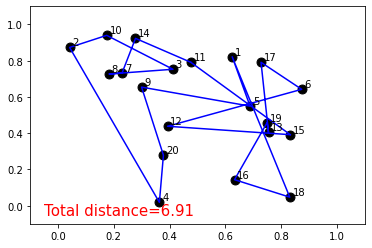

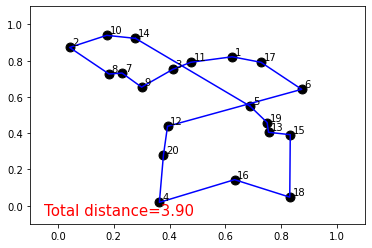

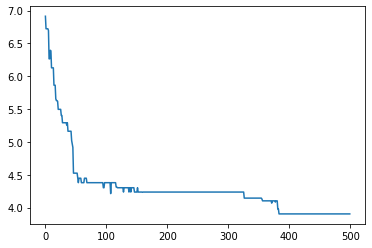

time cost : 37.20733 sec
------------------第 18 次------------------


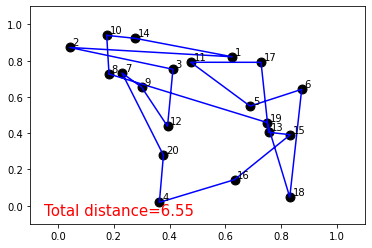

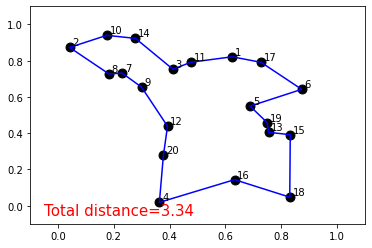

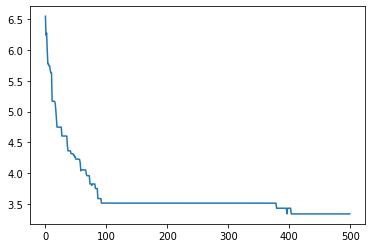

time cost : 36.23693 sec
------------------第 19 次------------------


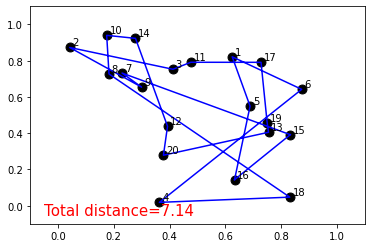

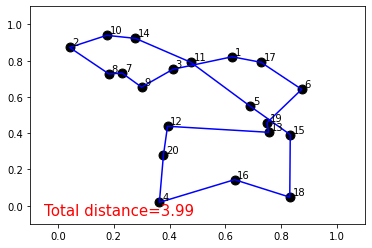

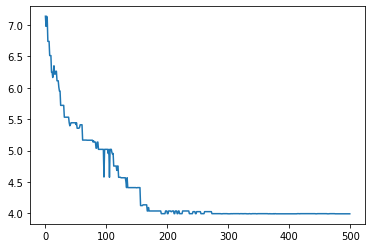

time cost : 34.06651 sec
------------------第 20 次------------------


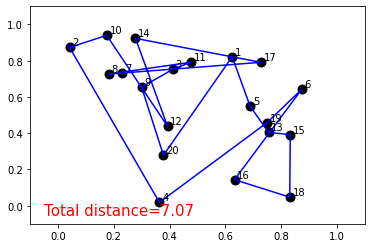

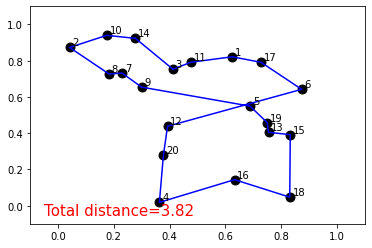

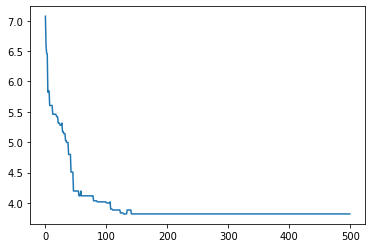

time cost : 35.31017 sec
---------距离--------
平均值为：3.699333
方差为：0.096149
最优值为:第7次:3.335463
最差值为:第5次:4.222783
---------时间--------
平均值为：34.688271
方差为：5.721657
最优值为:第4次:29.672185
最差值为:第16次:39.477219


In [155]:
TSP()